In [1]:
from periodic_orbits import is_periodic, is_equilibrium, stg_coordinate, get_periodic_domains
from ode_functions import theta_from_param,ic_function, fun, convert_to_dict, get_parameter_node, get_ic_domain, plot_projections, plot_time_series, plot_phase_projection
from ipynb.fs.full.ode_functions import *
from periodic_orbits2 import check_sequence
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from colorama import Fore

In [2]:
#decay rates
decays = {'d_p' : 1, 'd_mc' : 1, 'd_mn' : 1}

#hill coefficient
n = 90

#ode solver parameters
t0 = 0
tf = 100

In [3]:
#Import parameters
top_all = pd.read_csv("Parameter_datasets/P1TBW50Nodes.csv", header = None)#csv is 50 parameter sets, each as a row
top_params = convert_to_dict_2(top_all)

In [4]:
# #Import parameters

top1 = pd.read_csv("Parameter_datasets/P1TBWnode1.csv", header = None)
topparams1 = convert_to_dict(top1)

top2 = pd.read_csv("Parameter_datasets/P1TBWnode2.csv", header = None)
topparams2 = convert_to_dict(top2)

top3 = pd.read_csv("Parameter_datasets/P1TBWnode3.csv", header = None)
topparams3 = convert_to_dict(top3)

top4 = pd.read_csv("Parameter_datasets/P1TBWnode4.csv", header = None)
topparams4 = convert_to_dict(top4)

# top5 = pd.read_csv("Parameter_datasets/P1TBWnode5.csv", header = None)
# topparams5 = convert_to_dict(top5)

# top6 = pd.read_csv("Parameter_datasets/P1TBWnode6.csv", header = None)
# topparams6 = convert_to_dict(top6)

# top7 = pd.read_csv("Parameter_datasets/P1TBWnode7.csv", header = None)
# topparams7 = convert_to_dict(top7)

# top8 = pd.read_csv("Parameter_datasets/P1TBWnode8.csv", header = None)
# topparams8 = convert_to_dict(top8)

# top9 = pd.read_csv("Parameter_datasets/P1TBWnode9.csv", header = None)
# topparams9 = convert_to_dict(top9)

# top10 = pd.read_csv("Parameter_datasets/P1TBWnode10.csv", header = None)
# topparams10 = convert_to_dict(top10)

# top_params = [topparams1, topparams2, topparams3, topparams4, topparams6, topparams7, topparams8,
#               topparams9, topparams10]

In [5]:
list1 = [topparams1, topparams2, topparams3, topparams4]
for param in list1:
    top_params.append(param)

In [6]:
top_ICs = []
random.seed(0)
for i in range(10):
    top_ICs.append(ic_function("011", top_params[0]))#011 to avoid overshoot, and it is division point

In [7]:
%store top_ICs

Stored 'top_ICs' (list)


In [8]:
top_lengths = []#store orbit lengths, each set of 10 lengths corresponds to different ICs within same parameter
top_sizes = []
top_error_params = []
for i in range(len(top_params)):
    try:
        param = top_params[i]
        theta = theta_from_param(param)
        for IC in top_ICs:
            sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,90,decays), [0,100], y0 = IC, method = 'BDF')
#             output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
#             top_lengths.append(len(output))
#             top_sizes.append(upper_double_id(output))
    except ValueError:
        top_error_params.append(i)
print(top_error_params)

ipynb.fs.full.ode_functions:153: RuntimeWarning: overflow encountered in double_scalars
ipynb.fs.full.ode_functions:153: RuntimeWarning: invalid value encountered in double_scalars
ipynb.fs.full.ode_functions:155: RuntimeWarning: overflow encountered in double_scalars
/Users/Erika/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:305: RuntimeWarning: invalid value encountered in greater_equal
  f_sign = 2 * (np.real(f) >= 0).astype(float) - 1
/Users/Erika/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:334: RuntimeWarning: invalid value encountered in less
  diff_too_small = max_diff < NUM_JAC_DIFF_REJECT * scale
/Users/Erika/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:359: RuntimeWarning: invalid value encountered in less
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
/Users/Erika/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:360: RuntimeWarning: invalid 

[23, 24, 27, 44]


In [9]:
good_top_params = []
top_lengths = []#store orbit lengths, each set of 10 lengths corresponds to different ICs within same parameter
top_sizes = []

for i in range(len(top_params)):
    if i not in top_error_params:
        good_top_params.append(i)

for i in good_top_params:#only indices that don't fail for any of selected ICs
    param = top_params[i]#select good params from original list
    theta = theta_from_param(param)
    for IC in top_ICs:
        sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,90,decays), [0,100], y0 = IC, method = 'BDF')
        output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
        top_lengths.append(len(output))
        top_sizes.append(upper_double_id(output))#make super right double id function is used

/Users/Erika/Documents/Math/Research/periodic_orbits.py:96: UserWarning: get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = 2. The trajectory may not be periodic.
  warnings.warn('get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = {}. The trajectory may not be periodic.'.format(num_periods_to_verify))


In [10]:
%store top_sizes

Stored 'top_sizes' (list)


In [16]:
# #### observe orbit lengths (columns are different initial conditions)
npendpts = np.linspace(0, 10*(len(good_top_params)),len(good_top_params)+1)#creates as floats
endpts = []#above, as integers
goodendpts = []
for i in npendpts:
    endpts.append(int(i))

npgood = np.linspace(0,len(top_params)-1,len(top_params))
for i in npgood:
    if i not in top_error_params:
        goodendpts.append(int(i))

for i in range(len(goodendpts)):
    print('top_param', goodendpts[i], ':', top_lengths[endpts[i]:endpts[i+1]])

top_param 0 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 1 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 2 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 3 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 4 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 5 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 6 : [15, 7, 7, 7, 7, 7, 7, 7, 7, 7]
top_param 7 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 8 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 9 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 10 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 11 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 12 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 13 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 14 : [77, 8, 63, 8, 8, 8, 84, 8, 8, 8]
top_param 15 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 16 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 17 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 18 : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
top_param 19 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 20 : [8, 6, 54, 6, 6, 6, 42, 6, 7, 6]
top_param 21 : [6, 6, 6, 6, 6, 6, 6, 6

In [17]:
#observe orbit lengths (columns are different initial conditions)
for i in range(len(goodendpts)):
    print('top_param', goodendpts[i], ':', top_sizes[endpts[i]:endpts[i+1]])

top_param 0 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 1 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 2 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 3 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 4 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 5 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
top_param 6 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 7 : ['Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small']
top_param 8 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 9 : ['Small', 'Small', 'Small', 'Small', 'Sma

So there are cases where one parameter set seems to give different length orbits for different initial conditions... Birythmicity? Likely not, but for reference (plotted below) it occurs for top_params[13,16,19,20,21,22,25,26,31,33,35,36]. Always differ in last IC.

### Examine distances between theta_Mc,Mc and theta_Mc,Mn
To determine if cases where errors arise have smaller separations than those for which no errors arise.

In [30]:
theta_distances = []
for i in range(len(top_params)):
    val = top_params[i]['thetaMcMc']-top_params[i]['thetaMnMc']
    theta_distances.append(val)

In [31]:
for i in range(len(top_params)):
    if i in top_error_params:
        print(Fore.RED + "top_param", i, theta_distances[i])
    else:
        print(Fore.BLACK + "top_param", i, theta_distances[i])

top_param 0 0.125
top_param 1 0.125
top_param 2 0.125
top_param 3 0.125
top_param 4 0.125
top_param 5 0.125
top_param 6 0.25
top_param 7 0.25
top_param 8 0.25
top_param 9 0.125
top_param 10 0.125
top_param 11 0.25
top_param 12 0.125
top_param 13 0.125
top_param 14 0.25
top_param 15 0.125
top_param 16 0.25
top_param 17 0.125
top_param 18 0.125
top_param 19 0.125
top_param 20 0.125
top_param 21 0.125
top_param 22 0.125
top_param 23 0.25
top_param 24 0.125
top_param 25 0.125
top_param 26 0.125
top_param 27 0.125
top_param 28 0.125
top_param 29 0.125
top_param 30 0.125
top_param 31 0.25
top_param 32 0.125
top_param 33 0.125
top_param 34 0.125
top_param 35 0.125
top_param 36 0.125
top_param 37 0.25
top_param 38 0.125
top_param 39 0.125
top_param 40 0.125
top_param 41 0.125
top_param 42 0.25
top_param 43 0.125
top_param 44 0.125
top_param 45 0.125
top_param 46 0.25
top_param 47 0.25
top_param 48 0.25
top_param 49 0.125


Conclusion: Nothing unusual about the distance between these thresholds...

### Plot ICs in phase space to see if last one is far away from rest

In [50]:
xs = []
ys = []
zs = []
for i in range(len(top_ICs)):
    xs.append(top_ICs[i][0])
    ys.append(top_ICs[i][1])
    zs.append(top_ICs[i][2])

<IPython.core.display.Javascript object>


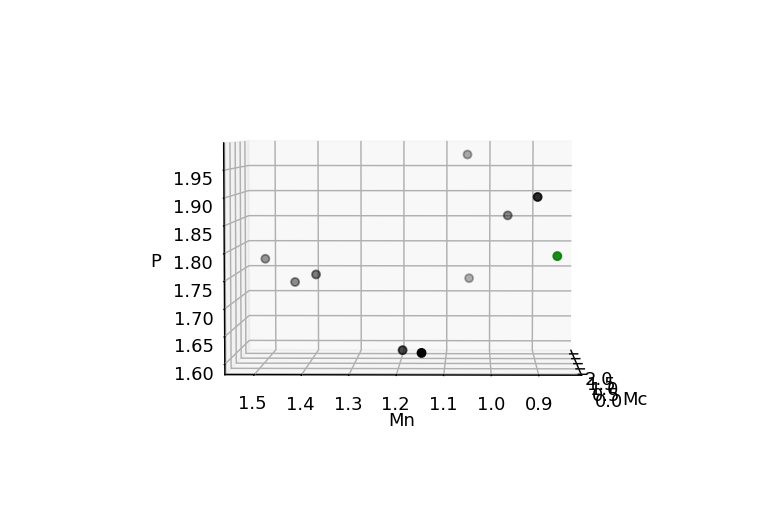

In [61]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xs, ys, zs, color = ['black','black','black','black','black','black','black','black','black','green'])
ax.set_xlabel('Mc')
ax.set_ylabel('Mn')
ax.set_zlabel('P');

Conclusion: Last IC is second smallest in Mc, largest in Mn, and average in P.

### Line stuff left over from 10 sample case

In [8]:
#removed param 5 (top_params[4]) for now
large, small = separate(top_params, '111')

In [9]:
line_list = generate_all_lines(small, large, 50)

In [10]:
%%time
check_list(line_list)#20 pairs to check

CPU times: user 4min 9s, sys: 3.09 s, total: 4min 12s
Wall time: 4min 49s


[True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True]

In [14]:
line = line_list[0]
sizes = []
#for the sake of easy ICs for first run
param = line[0]
sol = scipy.integrate.solve_ivp(fun, [0, tf], y0 = [param['thetaMnMc'], param['thetaPMn'], param['thetaMcP']], args = [param, n, decays], method = 'BDF')
#create sizes, list of lenghts in forward direction
for param in line:
    theta = theta_from_param(param)
    IC = [sol.y[0,-1],sol.y[1,-1],sol.y[2,-1]]
    sol = scipy.integrate.solve_ivp(fun, [0, tf], y0 = IC, args = [param, n, decays], method = 'BDF')
    if param == line[29]:
        sol1 = sol
    if param == line[33]:
        sol2 = sol
    if param == line[34]:
        sol3 = sol
    if param == line[36]:
        sol4 = sol
    if param == line[37]:
        sol5 = sol
    if param == line[38]:
        sol6 = sol
    if param == line[39]:
        sol7 = sol
    output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
    size = upper_double_id(output)
    sizes.append(size)

In [17]:
rev_line = line.copy()
rev_line.reverse()
rev_sizes = []
#for the sake of easy ICs for first run
param = rev_line[0]
sol = scipy.integrate.solve_ivp(fun, [0, tf], y0 = [param['thetaMnMc'], param['thetaPMn'], param['thetaMcP']], args = [param, n, decays], method = 'BDF')
for param in rev_line:
    theta = theta_from_param(param)
    rev_IC = [sol.y[0,-1],sol.y[1,-1],sol.y[2,-1]]
    sol = scipy.integrate.solve_ivp(fun, [0, tf], y0 = rev_IC, args = [param, n, decays], method = 'BDF')
    if param == line[29]:
        sol1b = sol
    if param == line[33]:
        sol2b = sol
    if param == line[34]:
        sol3b = sol
    if param == line[36]:
        sol4b = sol
    if param == line[37]:
        sol5b = sol
    if param == line[38]:
        sol6b = sol
    if param == line[39]:
        sol7b = sol
    output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
    size = upper_double_id(output)
    rev_sizes.append(size)
rev_rev_sizes = rev_sizes.copy()
rev_rev_sizes.reverse()

In [18]:
output1 = get_periodic_domains(sol1.y, theta_from_param(line[29]), num_periods_to_verify = 2)
output2 = get_periodic_domains(sol1b.y, theta_from_param(line[29]), num_periods_to_verify = 2)

In [19]:
upper_double_id(output1)

'Large'

In [20]:
upper_double_id(output2)

'Small'

In [13]:
for i in range(len(sizes)):
    print(i, sizes[i], rev_rev_sizes[i])

0 Large Large
1 Large Large
2 Large Large
3 Large Large
4 Large Large
5 Large Large
6 Large Large
7 Large Large
8 Large Large
9 Large Large
10 Large Large
11 Large Large
12 Large Large
13 Large Large
14 Large Large
15 Large Large
16 Large Large
17 Large Large
18 Large Large
19 Large Large
20 Large Large
21 Large Large
22 Large Large
23 Large Large
24 Large Large
25 Large Large
26 Large Large
27 Large Large
28 Large Large
29 Large Small
30 Large Large
31 Large Large
32 Large Large
33 Large Small
34 Large Small
35 Small Small
36 Small Large
37 Small Large
38 Small Large
39 Small Large
40 Small Small
41 Small Small
42 Small Small
43 Small Small
44 Small Small
45 Small Small
46 Small Small
47 Small Small
48 Small Small
49 Small Small


### Plotting - check out the parameter sets which yielded both small and large for difference ICs?

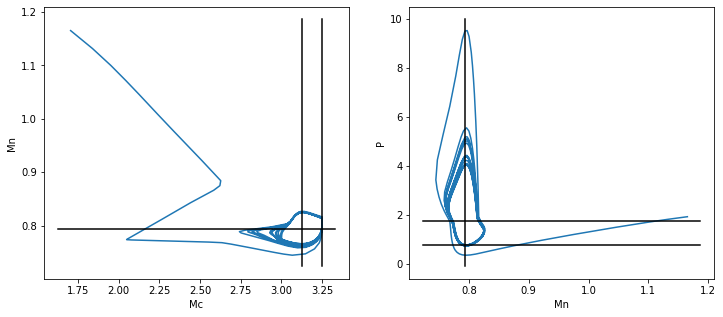

In [19]:
#plotting framework
#top_params[13,16,19,20,21,22,25,26,31,33,35,36] have different lengths for last IC as compared to rest of ICs.
param = top_params[20]
sol0 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = top_ICs[0], method = 'BDF')
# sol1 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = top_ICs[1], method = 'BDF')

# param = line[29]
fig,(ax1,ax2) = plot_projections(sol0, param)
# plot_projections(sol1, param, axs = (ax1, ax2))
# ax1.set_xlim(1,2.75)
# # ax1.set_ylim(0.3,0.8)
# ax2.set_xlim(0.4,0.8)
# ax2.set_ylim(0,25)

(0, 20)

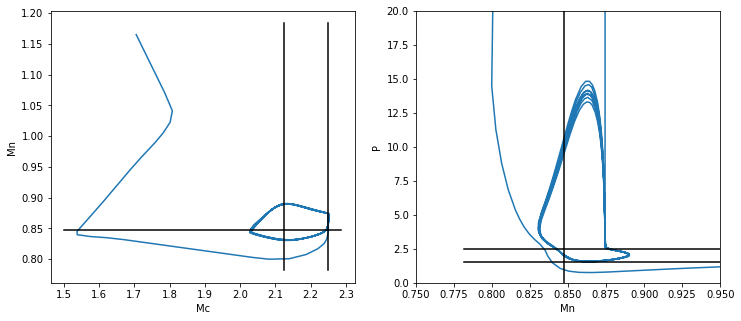

In [17]:
#extra plotting framework

param = top_params[5]
sol0 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = top_ICs[0], method = 'BDF')
# sol1 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = top_ICs[1], method = 'BDF')

# param = line[29]
fig,(ax1,ax2) = plot_projections(sol0, param)
# plot_projections(sol1, param, axs = (ax1, ax2))
# ax1.set_xlim(1,2.75)
# # ax1.set_ylim(0.3,0.8)
ax2.set_xlim(0.75,0.95)
ax2.set_ylim(0,20)

### PCA Stuff

In [21]:
#0 is small, 1 is large
top_param_colors = [0,1,1,1,1,0,0,0,1]

topdf1 = pd.DataFrame.from_dict(topparams1, orient = 'index')
topdf1 = topdf1.T
topdf2 = pd.DataFrame.from_dict(topparams2, orient = 'index')
topdf2 = topdf2.T
topdf3 = pd.DataFrame.from_dict(topparams3, orient = 'index')
topdf3 = topdf3.T
topdf4 = pd.DataFrame.from_dict(topparams4, orient = 'index')
topdf4 = topdf4.T
topdf6 = pd.DataFrame.from_dict(topparams6, orient = 'index')
topdf6 = topdf6.T
topdf7 = pd.DataFrame.from_dict(topparams7, orient = 'index')
topdf7 = topdf7.T
topdf8 = pd.DataFrame.from_dict(topparams8, orient = 'index')
topdf8 = topdf8.T
topdf9 = pd.DataFrame.from_dict(topparams9, orient = 'index')
topdf9 = topdf9.T
topdf10 = pd.DataFrame.from_dict(topparams10, orient = 'index')
topdf10 = topdf10.T

top_param_data = pd.concat([topdf1,topdf2,topdf3,topdf4,topdf6,topdf7,topdf8,topdf9,topdf10])

top_param_data['OrbitLength'] = top_param_colors

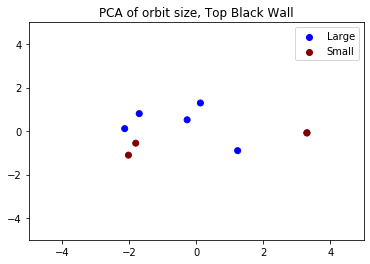

In [22]:
pca = PCA(n_components = 2)
pca.fit(top_param_data.iloc[:,0:17])
top_pca = pca.transform(top_param_data.iloc[:,0:17])

labels = top_param_data.loc[:,'OrbitLength']
label_colors = {0:'maroon',1:'blue'}
cvec = [label_colors[label] for label in labels]
plt.scatter(top_pca[:,0],top_pca[:,1], c = cvec)
plt.scatter(25,25,c = 'blue',label = 'Large')#point at (25,25) just for labeling purposes
plt.scatter(25,25,c = 'maroon', label = 'Small')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('PCA of orbit size, Top Black Wall')
plt.legend(loc = 'best')
# plt.savefig('pca_all_attributes.png')
plt.show()
plt.close()